# Imports Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes =True)
from pandas.plotting import scatter_matrix
%matplotlib inline
import warnings

## Load the dataset
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [2]:
data=pd.read_csv('C:\\Users\\VISHAL\\Desktop\\DATA SCIENCE\\bank-additional\\bank.csv',sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Input variables:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')


7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Feature Engineering

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [5]:
data.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [6]:
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

### Data Visualization
Visualising the data is an important step of the data analysis. With a graphical visualisation of the data we have a better understanding of the various features values distribution:

<function matplotlib.pyplot.show(*args, **kw)>

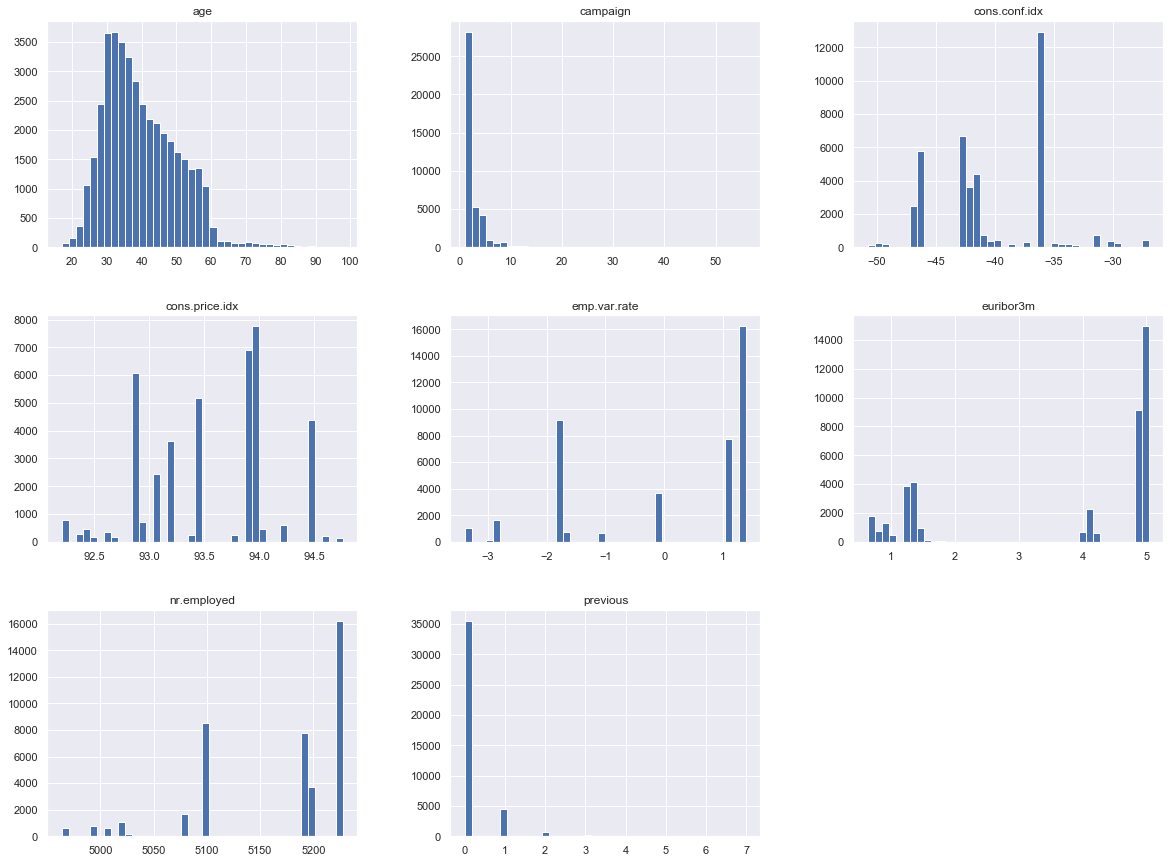

In [7]:
data.hist(bins=40,figsize=(20,15))
plt.show

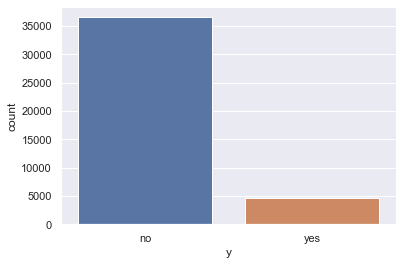

In [8]:
sns.countplot(data['y'])

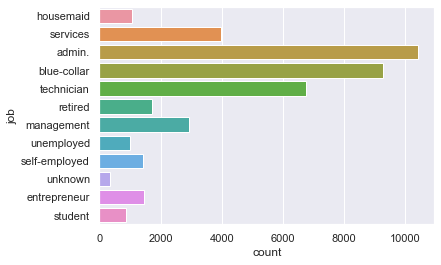

In [9]:
sns.countplot(y='job',data=data)

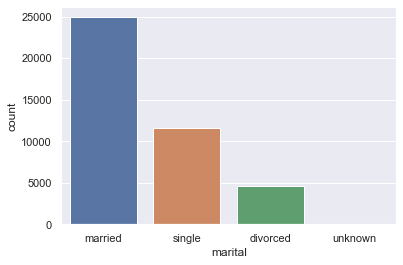

In [10]:
sns.countplot(data['marital'])

<function matplotlib.pyplot.show(*args, **kw)>

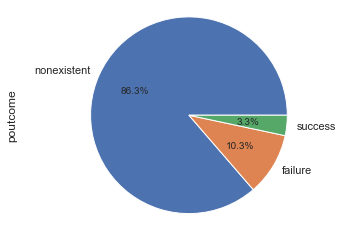

In [11]:
fig, ax = plt.subplots()
data['poutcome'].value_counts().plot(ax=ax, kind='pie' ,autopct='%1.1f%%')
ax.axis('equal')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

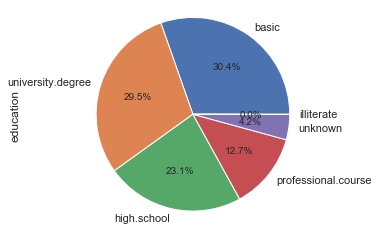

In [12]:
fig, ax = plt.subplots()
data['education'].value_counts().plot(ax=ax, kind='pie', autopct='%1.1f%%')
ax.axis('equal')
plt.show

### Pre Processing
For encoding the levels of a categorical features into numeric values. LabelEncoder encode labels with value between 0 and n_classes-1.

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label=LabelEncoder()

In [15]:
data.job = label.fit_transform(data.job)
data.marital = label.fit_transform(data.marital)
data.education = label.fit_transform(data.education)
data.housing = label.fit_transform(data.housing)
data.loan = label.fit_transform(data.loan)
data.poutcome = label.fit_transform(data.poutcome)
data.y = label.fit_transform(data.y)

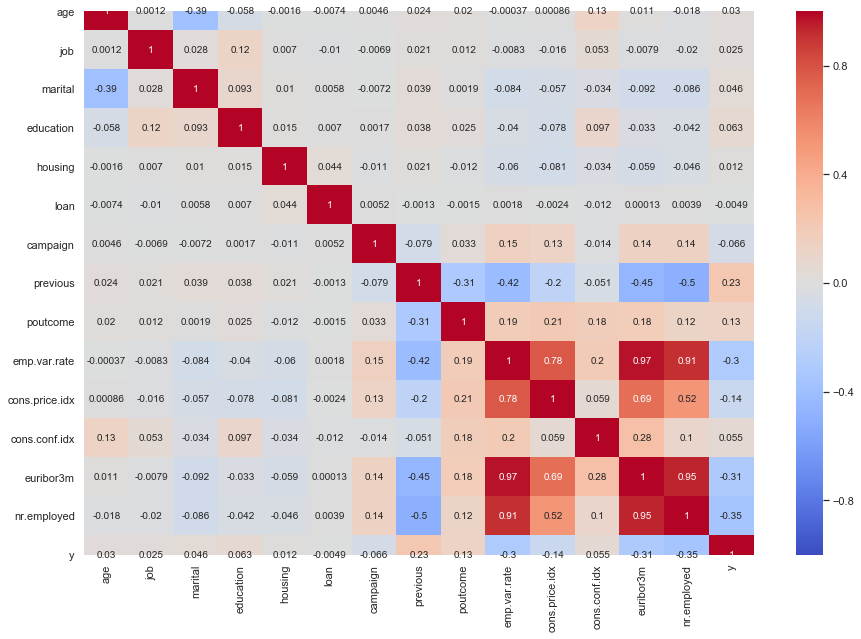

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),vmin=-1,cmap='coolwarm',annot=True)


The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the bettere correlation there is between two characteristics. 

In [17]:
data.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,1,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,2,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,1,0,2,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [18]:
x=data.drop('y',axis=1)
y=data['y']

### Train and Test split
Now that the data has been prepared, we are ready to train our model and make predictions. Let’s first split the data into the training and testing sets:

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.80,random_state=4)

### Building Predictive Model
We will try four classification algorithms, i.e. Logistic Regression, Support Vector Machine, Decision Trees, and Random Forest, and then compute their accuracy score choose the classifier with the highest accuracy:

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [22]:
LR=LogisticRegression(max_iter=1000)
Dtree=DecisionTreeClassifier()
rfc=RandomForestClassifier(n_estimators=10)
clf = SVC(kernel='rbf', gamma='auto')

def accuracy (a,b,c,d):
    for every in (a,b,c,d):
        every.fit(x_train,y_train)
        print(every.__class__.__name__,'accuracy_score=',accuracy_score(y_test,every.predict(x_test)))
accuracy(LR,Dtree,rfc,clf)

C:\Users\VISHAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression accuracy_score= 0.898546326363388
DecisionTreeClassifier accuracy_score= 0.8339959333555886
RandomForestClassifier accuracy_score= 0.8876513611119541
SVC accuracy_score= 0.8871657916299961


In [23]:
from sklearn.metrics import classification_report
yhat = LR.predict(x_test)
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     29222
           1       0.71      0.17      0.28      3729

    accuracy                           0.90     32951
   macro avg       0.81      0.58      0.61     32951
weighted avg       0.88      0.90      0.87     32951



In [24]:
from sklearn.metrics import classification_report
yhat = LR.predict(x_test)
print(confusion_matrix(y_test,yhat))

[[28966   256]
 [ 3087   642]]


## Conclusion
We finally find accuracy score of 89.85% using Logistic Regression algorithm and parameters optimisation.